<h1>Dataset Exploration</h1>

In [1]:
from pycocotools.coco import COCO
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image

In [2]:
DATADIR = "cocodoom/"

dataSplit, run = "run-full-val", "run2"

annFile = '{}{}.json'.format(DATADIR,dataSplit)

In [3]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=16.00s)
creating index...
index created!


In [4]:
player_positions = {"run1":{}, "run2":{}, "run3":{}}

with open(DATADIR+run+"/log.txt", 'r') as log_file:
    for line in log_file:
        if "player" in line:
            line = line.strip()
            tic, stats = line.split("player:")
            x, y, z, angle = stats.split(",")

            # Store position in the dictionary
            player_positions[run][int(tic)] = (float(x), float(y), float(z), float(angle))

In [5]:
def getSegmentationMask(rgb_filename):
    return rgb_filename.replace("rgb", "objects")

def getDepthMask(rgb_filename):
    return rgb_filename.replace("rgb", "depth")

In [6]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print("Categories: \n{}".format(" ".join(nms)))
print(len(cats))

Categories: 
POSSESSED SHOTGUY VILE FIRE UNDEAD TRACER SMOKE FATSO FATSHOT CHAINGUY TROOP SERGEANT HEAD BRUISER BRUISERSHOT KNIGHT SKULL SPIDER BABY CYBORG PAIN WOLFSS BARREL TROOPSHOT HEADSHOT ROCKET PLASMA BFG ARACHPLAZ PUFF BLOOD TFOG EXTRABFG MISC0 MISC1 MISC2 MISC3 MISC4 MISC10 MISC11 MISC12 INV MISC13 INS MISC14 MISC15 MEGA CLIP MISC17 MISC18 MISC19 MISC20 MISC21 MISC22 MISC23 MISC24 MISC25 CHAINGUN MISC26 MISC27 MISC28 SHOTGUN SUPERSHOTGUN MISC29 MISC30 MISC32 MISC33 MISC34 MISC38 MISC39 MISC40 MISC41 MISC42 MISC43 MISC44 MISC45 MISC46 MISC47 MISC49 MISC50 MISC56 MISC58 MISC59 MISC60 MISC67 MISC68 MISC69 MISC71 MISC73 MISC74 MISC75 MISC76 MISC77 MISC84
94


In [ ]:
#Plot a random image and its annotations
imgIds = coco.getImgIds();
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
frame_rgb = plt.imread(DATADIR + img['file_name'])

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(frame_rgb) 
axs[0].set_title('Frame') 
axs[0].axis('off')

axs[1].set_title("Objects") 
axs[1].imshow(frame_rgb)
anns = coco.loadAnns(coco.getAnnIds(imgIds=[img["id"]])) 
colors = plt.get_cmap('tab20', len(coco.getCatIds())) 
for ann in anns: 
    bbox = ann['bbox'] 
    category_id = ann['category_id'] 
    color = colors(category_id / len(coco.getCatIds())) 
    x, y, w, h = bbox 
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor=color, alpha=0.5) 
    axs[1].add_patch(rect)
axs[1].axis('off')


segmentationMask = plt.imread(DATADIR + getSegmentationMask(img["file_name"])) 
axs[2].imshow(segmentationMask) 
axs[2].set_title('Segmentation Mask') 
axs[2].axis('off')

depthMap = plt.imread(DATADIR + getDepthMask(img["file_name"])) 
axs[3].imshow(depthMap) 
axs[3].set_title('Depth Map') 
axs[3].axis('off')

plt.show()

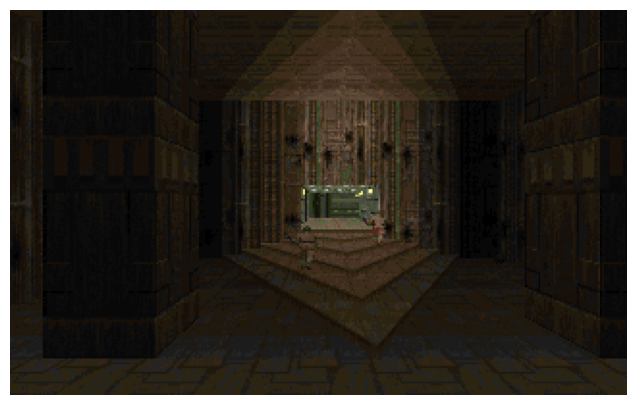

(-97.2494, 782.437, 97.1546, 1.5708)


In [8]:
imgIds = coco.getImgIds();
img = coco.loadImgs(imgIds[0])[0]
frame_rgb = plt.imread(DATADIR + img['file_name'])

plt.figure(figsize=(20, 5))
plt.imshow(frame_rgb)
plt.axis('off') 
plt.show()
print(player_positions[run][int(img['file_name'].replace(".png", "").split("/")[-1])])

In [15]:
imgIds = coco.getImgIds();
img = coco.loadImgs(imgIds[43])[0]
frame_rgb = plt.imread(DATADIR + img['file_name'])
plt.imsave('test_frame.png', frame_rgb, format='png')

# plt.figure(figsize=(20, 5))
# plt.imshow(frame_rgb)
# plt.axis('off') 
# plt.show()
print(player_positions[run][int(img['file_name'].replace(".png", "").split("/")[-1])])

(-490.369, 829.539, 104.558, 0.417243)


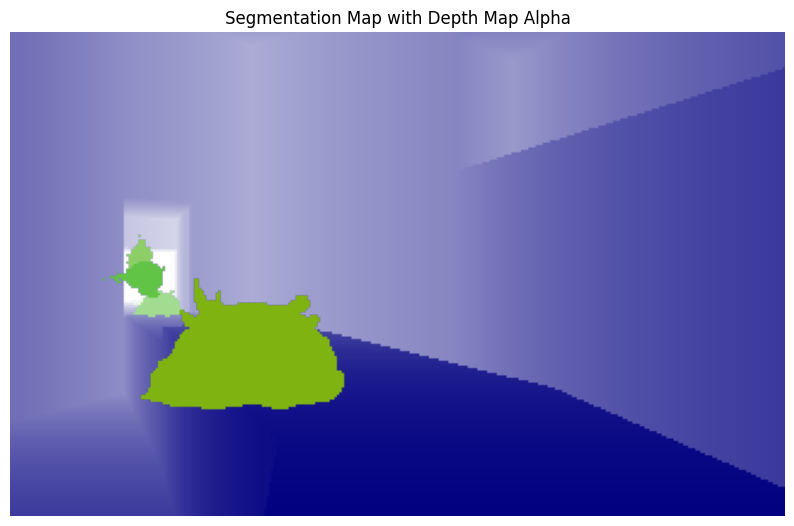

In [10]:
depthMap_normalized = 1 - (depthMap - depthMap.min()) / (depthMap.max() - depthMap.min()) 

segmentation_rgba = np.dstack((segmentationMask, depthMap_normalized)) 

plt.figure(figsize=(10, 10)) 
plt.imshow(segmentation_rgba) 
plt.title('Segmentation Map with Depth Map Alpha') 
plt.axis('off') 
plt.show()

In [13]:
#Play the run - pressing q exits this
imgIds.sort()

for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    frame = cv2.imread(DATADIR + img['file_name'])
    if frame is None:
        continue

    cv2.imshow('Video', frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [ ]:
#Play the run - pressing q exits this
imgIds.sort()

for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    frame = cv2.imread(DATADIR + img['file_name'])
    tic = int(img['file_name'].replace(".png", "").split("/")[-1])
    print(img['file_name'])
    if frame is None:
        continue

    cv2.imshow('Video', frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()